<a href="https://colab.research.google.com/github/Areefahnk/Web-App-Classifying-Bullying-Comments-using-Machine-Learning/blob/main/DetectOnlineBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [27]:
import pandas as pd

df = pd.read_json(r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json', lines= True)
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [28]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [29]:
df.shape

(20001, 3)

In [30]:
import nltk
print(nltk.data.path)

['C:\\Users\\wealt/nltk_data', 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\wealt\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data', 'C:\\Users\\wealt

**Data Processing**

In [32]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Set NLTK data path if you have local data
nltk.data.path.append(r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\nltk_data')

# Load dataset from JSON
data = pd.read_json(r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json', lines=True)

# Print the column names to verify the structure
print("Columns in the dataset:", data.columns)
print(data.head())  # Check the first few rows to verify the structure

# Preprocessing function
def preprocess_extras(extras):
    # Handle NaN or non-string values
    if isinstance(extras, str):
        tokens = word_tokenize(extras.lower())
        stop_words = set(stopwords.words('english'))
        filtered_words = [w for w in tokens if w.isalpha() and w not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''  # Return empty string for non-string values

# Print the first row to understand the structure better
print(data.iloc[0])

# Now check for the correct text column
# Replace 'extras' or 'message' with the actual column name that contains the text, if different
if 'extras' in data.columns:
    data['processed_extras'] = data['extras'].apply(preprocess_extras)
elif 'message' in data.columns:
    data['processed_extras'] = data['message'].apply(preprocess_extras)
else:
    raise KeyError("Extras column not found! Please verify if the dataset has a column with the actual text content.")

# Check if 'processed_extras' was created successfully
if 'processed_extras' in data.columns:
    print("Processed extras created successfully!")
else:
    raise KeyError("'processed_extras' column not found!")

# Split the data into features and labels
if 'content' in data.columns:
    X = data['processed_extras']
    y = data['content']  # Assuming label column exists
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split successfully!")
else:
    raise KeyError("Label column not found!")


Columns in the dataset: Index(['content', 'annotation', 'extras'], dtype='object')
                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN  
content              Get fucking real dude.
annotation    {'notes': '', 'label': ['1']}
extras                                  NaN
Name: 0, dtype: object
Processed extras created successfully!
Data split successfully!


In [33]:
print(data.columns)

Index(['content', 'annotation', 'extras', 'processed_extras'], dtype='object')


In [34]:
data['extras'].unique()

print(data.columns)

Index(['content', 'annotation', 'extras', 'processed_extras'], dtype='object')


In [35]:
df.extras.unique()

array([nan])

In [36]:
df["notes"] = df.annotation.apply(lambda x: x.get('notes'))
df.notes.unique()

array([''], dtype=object)

In [44]:
import nltk
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer  # Correct import for Tokenizer

# Set NLTK data path
nltk.data.path.append(r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\nltk_data')


In [46]:
# First, extract 'content' from 'annotation'
df["content"] = df.annotation.apply(lambda x: x.get('content') if x else None)

# Then, handle cases where 'content' is None or is not a list
df["content"] = df.content.apply(lambda x: x[0] if x and isinstance(x, list) else None)


In [47]:
df

,content,annotation,extras,notes
0,None,"{'notes': '', 'label': ['1']}",NaN,
1,None,"{'notes': '', 'label': ['1']}",NaN,
2,None,"{'notes': '', 'label': ['1']}",NaN,
3,None,"{'notes': '', 'label': ['1']}",NaN,
4,None,"{'notes': '', 'label': ['1']}",NaN,
...,...,...,...,...
19996,None,"{'notes': '', 'label': ['0']}",NaN,
19997,None,"{'notes': '', 'label': ['0']}",NaN,
19998,None,"{'notes': '', 'label': ['0']}",NaN,
19999,None,"{'notes': '', 'label': ['0']}",NaN,


**Droping the columns which are not necessary**

In [48]:
df = df.drop(['annotation','extras','notes'],axis='columns')


In [49]:
df

,content
0,None
1,None
2,None
3,None
4,None
...,...
19996,None
19997,None
19998,None
19999,None


In [51]:
bully = df[df.content==1]
nonbully = df[df.content==0]

In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True


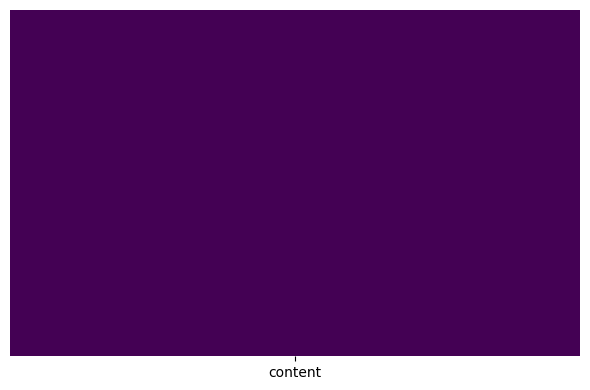

In [53]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

c:\Users\wealt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\wealt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


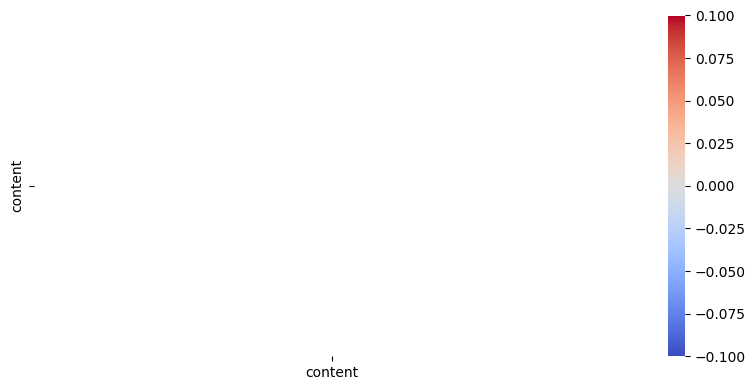

In [54]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [75]:
def load_data(path):
    df = pd.read_json(path, lines= True)
    
    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])
    
    X = df.content.values
    y = df.label.values
    
    return X, y

In [76]:
def tokenize(extras):

    tokens = word_tokenize(extras)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


In [77]:
from nltk.tokenize import word_tokenize

def tokenize(extras):
    tokens = word_tokenize(extras)
    return tokens

print(tokenize("whoa stops you's stupid sjw"))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\wealt/nltk_data'
    - 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\wealt\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\wealt\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
    - 'C:\\Users\\wealt\\Documents\\Cyberbullying Detection with ML\\Cyberbullying_Detector_ML\\nltk_data'
**********************************************************************


In [78]:
vect = CountVectorizer(tokenizer=tokenize)
vect

CountVectorizer(tokenizer=<function tokenize at 0x0000023E31957B00>)

In [80]:
import pandas as pd

# Load the dataset
url = r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json'
df = pd.read_json(url, lines=True)  # Make sure to load the DataFrame correctly

# Check the structure of the DataFrame
print(df.shape)
print(df.head())

# Ensure that the DataFrame has at least 15000 rows and 2 columns
if df.shape[0] < 15000 or df.shape[1] < 2:
    raise ValueError("DataFrame does not have enough rows or columns for splitting.")

# Splitting the DataFrame into training and testing sets
X_train = df.iloc[:15000, 0:1]
X_test = df.iloc[15000:, 0:1]
y_train = df.iloc[:15000, 1]
y_test = df.iloc[15000:, 1]

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(20001, 3)
                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN  
(15000, 1) (5001, 1) (15000,) (5001,)


In [81]:
X_train.size

15000

In [82]:
X_train

,content
0,Get fucking real dude.
1,She is as dirty as they come and that crook ...
2,why did you fuck it up. I could do it all day...
3,Dude they dont finish enclosing the fucking s...
4,WTF are you talking about Men? No men thats n...
...,...
14995,What can you smell right now?
14996,yew neva seen mi dik nd lol thankz
14997,whwhwhwhoa just slow down. huh!? what do you ...
14998,What&;s a subject you wish you knew more about?


In [83]:
X_test.size

5001

In [84]:
X_test

,content
15000,How often do you get sick?
15001,Wow awesome question....I think my best achi...
15002,Nahh hates a strong word.
15003,does anyone sang you a song on public? if so ...
15004,Nope.
...,...
19996,I dont. But what is complaining about it goi...
19997,Bahah yeah i&;m totally just gonna&; get pis...
19998,hahahahaha >:) im evil mwahahahahahahahahaha
19999,What&;s something unique about Ohio? :)


In [85]:
20001-15000

5001

In [86]:
y_train

0        {'notes': '', 'label': ['1']}
1        {'notes': '', 'label': ['1']}
2        {'notes': '', 'label': ['1']}
3        {'notes': '', 'label': ['1']}
4        {'notes': '', 'label': ['1']}
                     ...              
14995    {'notes': '', 'label': ['0']}
14996    {'notes': '', 'label': ['0']}
14997    {'notes': '', 'label': ['0']}
14998    {'notes': '', 'label': ['0']}
14999    {'notes': '', 'label': ['0']}
Name: annotation, Length: 15000, dtype: object

In [87]:
y_train.head()

0    {'notes': '', 'label': ['1']}
1    {'notes': '', 'label': ['1']}
2    {'notes': '', 'label': ['1']}
3    {'notes': '', 'label': ['1']}
4    {'notes': '', 'label': ['1']}
Name: annotation, dtype: object

In [88]:
y_test.size

5001

In [90]:
import pandas as pd

# Sample DataFrame for demonstration
df = pd.DataFrame({
    'annotation': [{'label': 'positive'}, {'label': 'negative'}, {'label': 'positive'}, {'label': 'neutral'}]
})

# Extract the 'label' values from dictionaries in the 'annotation' column
df['label'] = df['annotation'].apply(lambda x: x.get('label') if isinstance(x, dict) else x)

# Split the DataFrame into training and testing sets
X_train = df.iloc[:3, 0:1]  # Example train split
X_test = df.iloc[3:, 0:1]   # Example test split
y_train = df.iloc[:3, 1]
y_test = df.iloc[3:, 1]

# Check unique values in y_test
print(y_test.unique())


['neutral']


**y_test had all labels 0's so we cannot test the trained model for label 1's**

**Making use of train_test_split() method helps in balanced spliting- in form of arrays**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
X_train

array(['  Yes. Karma :]',
       "LMAO. Vista isn't that bad. I did hate it  but on this computer I love it. You just need a faster laptop. Still using my n ...",
       "Damn  you're totally geeking out on us tonite.", ...,
       'damn you look great in HD I mean you look great either way but ya LOL what kind of cam you use? Xoxo',
       "don't you hate yogurt! When you do recover from hating yogurt  go to Trader Joe's  get the Greek style kind  it's fantastic!",
       'yeah dat bitch stabbed me in my eye when I was trying to hit the snooze buttone this morning'],
      dtype=object)

In [93]:
X_train.size

15000

In [94]:
X_test

array(['Fuck.',
       ' If you had to give up one favorite food  what would the most difficult?',
       'ouch that sucks.', ...,
       'no  depeche mode sucks ass as well. se my earlier tweet. http://twitter.com/tcar/status/1073343643',
       "lmfao he's so cute tho seriously. im watching the AIR awards interviews omg so fucking cute &lt;3333",
       "They do fear us; why do you think they hate us owning guns? It's all that stands between them and absolute power."],
      dtype=object)

In [95]:
X_test.size

5001

In [96]:
y_train

array(['0', '0', '1', ..., '0', '1', '1'], dtype=object)

In [97]:
y_train.size

15000

In [98]:
y_test

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

In [99]:
y_test.size

5001

In [100]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

**CNN CLASSIFIER**

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
url = r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json'
X, y = load_data(url)  # Make sure `load_data` correctly reads and processes the dataset

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)  # Limit to the top 5000 words
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Define max length for padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Convert y labels to categorical if they are multi-class
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_classes)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy * 100)


c:\Users\wealt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.6511 - loss: 0.6185 - val_accuracy: 0.7769 - val_loss: 0.4553
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 153ms/step - accuracy: 0.8739 - loss: 0.3016 - val_accuracy: 0.8509 - val_loss: 0.3862
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.9692 - loss: 0.0966 - val_accuracy: 0.8600 - val_loss: 0.4382
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.9872 - loss: 0.0414 - val_accuracy: 0.8853 - val_loss: 0.5091
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.9924 - loss: 0.0276 - val_accuracy: 0.8662 - val_loss: 0.5980
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8727 - loss: 0.5724
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
Confusion Matrix:
 [[2111  313]
 [ 193 1384]]
Accuracy: 87.35316395759583


**LSTM REGRESSION**

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
url = r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json'
X, y = load_data(url)  # Ensure load_data is properly defined for your dataset

# Encode labels if necessary (for classification tasks)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)  # Use the top 5000 most frequent words
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Define the max length of sequences (adjust based on data)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# One-hot encode the labels for classification (if needed)
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy * 100)


Epoch 1/5


c:\Users\wealt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 358ms/step - accuracy: 0.6048 - loss: 0.6743 - val_accuracy: 0.6159 - val_loss: 0.6661
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 63s 313ms/step - accuracy: 0.6070 - loss: 0.6707 - val_accuracy: 0.6159 - val_loss: 0.6666
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 72s 359ms/step - accuracy: 0.6126 - loss: 0.6679 - val_accuracy: 0.6159 - val_loss: 0.6663
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 355ms/step - accuracy: 0.6084 - loss: 0.6699 - val_accuracy: 0.6159 - val_loss: 0.6661
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 320ms/step - accuracy: 0.6084 - loss: 0.6699 - val_accuracy: 0.6159 - val_loss: 0.6664
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.6089 - loss: 0.6693
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step
Confusion Matrix:
 [[2424    0]
 [1577    0]]
Accuracy: 60.58485507965088


In [106]:
url = r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [107]:
X_train

array(['it was just a joke man..i wasnt taking the piss out of anything.',
       ' What do you do when you have alot on your mind?',
       ' y0 v@q!N@ sm3lL lykK c0tT@q3 (h33s3', ...,
       'that sucks.  I heard about their closing a few months ago.  They were a great group of people.',
       "Hey DM me your addy...you get the can even if you don't get the job  'cause I HATE coffee!",
       'Agreed.... i mean honestly  Off The Wall  and Thriller.. nobody is fucking with those...'],
      dtype=object)

**GloVe**

In [110]:

# Converting string labels into numbers.
X_encoded=le.fit_transform(X_train)
print(X_encoded)

[10775  6204  5883 ...  8821 11985  4371]


In [111]:
X_encoded.shape

(16000,)

In [112]:
y_train

array([1, 0, 1, ..., 1, 1, 0])

In [113]:
y_train.shape

(16000,)

In [114]:
Xt_encoded = le.fit_transform(X_test)
print(Xt_encoded)

[2801 2793 2133 ... 2027  251 2555]


In [115]:
y_test

array([0, 1, 0, ..., 1, 0, 1])

In [116]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
X_encoded= X_encoded.reshape(-1, 1)
#y_train= y_train.reshape(-1, 1)
Xt_encoded= Xt_encoded.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
# Train the model using the training sets
model.fit(X_encoded,y_train)
y_pred = model.predict(Xt_encoded)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)

Labels: [0]
Confusion Matrix:
 [[2424]]
Accuracy: 0.6058485378655336
Score: 60.58485378655336


c:\Users\wealt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [117]:
def load_data(path):
    df = pd.read_json(path, lines= True)
    
    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])
    
    X = df.content.values
    y = df.label.values
    
    return X, y

def tokenize(text):

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    #print(clean_tokens)
    return clean_tokens

def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    
def main():
    url = r'C:\Users\wealt\Documents\Cyberbullying Detection with ML\Cyberbullying_Detector_ML\dataset.json'
    X, y = load_data(url)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    #initializing
    vect = CountVectorizer(tokenizer=tokenize)

    tfidf = TfidfTransformer()
    clf = RandomForestClassifier()

    # train classifier
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    clf.fit(X_train_tfidf, y_train)

    # predict on test data
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)
    y_pred = clf.predict(X_test_tfidf)
    
    # predict on test data
    X_test_counts = vect.transform(["whoa stop you stupid bitch sjw"])
    comment="whoa stop you stupid bitch sjw"
    print("Comment given: "+comment)
    print("Applying CountVectorizer on the given comment:")
    print(X_test_counts)
    X_test_tfidf = tfidf.transform(X_test_counts)
    print("Applying Tfidf after CountVectorizer:")
    print(X_test_tfidf)
    print("Results after applying RandomForest Algorithm")
    print("Given text: 'whoa stop you stupid bitch sjw' ")
    print("Prediction: {}\n".format(clf.predict(X_test_tfidf)))
    if(clf.predict(X_test_tfidf)=='1'):
      print("The comment that you had done now correlates to Bullying.Stop doing this!")
    display_results(y_test, y_pred)

main()


FileNotFoundError: File /content/drive/MyDrive/dataset.json does not exist

In [ ]:
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
X_test_tfidf

<5001x15077 sparse matrix of type '<class 'numpy.float64'>'
	with 67674 stored elements in Compressed Sparse Row format>

In [ ]:
print(vect.vocabulary_)

{'fuck': 5678, 'yo': 14930, 'couch': 3620, '@': 1009, 'dncr1804': 4381, 'i': 6945, 'do': 4385, "n't": 9191, 'even': 4969, 'know': 7818, 'what': 14489, 'did': 4226, 'or': 9806, 'said': 11505, 'that': 13236, 'wa': 14275, '``': 1028, 'emo-esque': 4821, "''": 6, 'ech': 4699, '!': 0, 'lol': 8274, '...': 262, '.if': 349, 'it': 7353, 'me': 8670, 'would': 14736, 'wash': 14349, 'the': 13243, 'sweat': 12928, 'at': 1714, 'least': 8037, 'twice': 13769, 'then': 13261, 'again': 1209, 'hate': 6442, 'bug': 2672, 'ha': 6265, 'loser': 8329, ':': 989, ')': 91, 'hive': 6686, '.': 260, 'get': 5897, 'well': 14445, 'soon': 12342, 'schmap': 11624, 'published': 10736, '3': 772, 'photo': 10231, 'of': 9638, 'mine': 8860, 'paris': 10004, '(': 90, 'tour': 13571, 'de': 3993, 'france': 5587, 'gay': 5822, 'pride': 10595, 'and': 1424, 'le': 8021, 'halle': 6372, 'all': 1317, 'are': 1590, 'on': 9734, 'flickr.com': 5424, 'idnt': 7001, 'kno': 7809, 'if': 7008, 'she': 11863, 'iz': 7385, 'hey': 6601, 'betch': 2202, 'wan': 1

In [ ]:
X_train

,content
0,Get fucking real dude.
1,She is as dirty as they come and that crook ...
2,why did you fuck it up. I could do it all day...
3,Dude they dont finish enclosing the fucking s...
4,WTF are you talking about Men? No men thats n...
...,...
14995,What can you smell right now?
14996,yew neva seen mi dik nd lol thankz
14997,whwhwhwhoa just slow down. huh!? what do you ...
14998,What&;s a subject you wish you knew more about?


In [ ]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: label, Length: 15000, dtype: object

In [ ]:
X_train1=X_train.to_xarray

In [ ]:
X_train1

<bound method NDFrame.to_xarray of                                                  content
0                                 Get fucking real dude.
1       She is as dirty as they come  and that crook ...
2       why did you fuck it up. I could do it all day...
3       Dude they dont finish enclosing the fucking s...
4       WTF are you talking about Men? No men thats n...
...                                                  ...
14995                      What can you smell right now?
14996                 yew neva seen mi dik nd lol thankz
14997   whwhwhwhoa just slow down. huh!? what do you ...
14998    What&;s a subject you wish you knew more about?
14999    im sure. people find anyting to talk about f...

[15000 rows x 1 columns]>

In [ ]:
y_train1=y_train.to_xarray

In [37]:
y_train1

NameError: name 'y_train1' is not defined